In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
df = pd.read_excel("Adidas_US_Sales_Datasets.xlsx")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
df.columns = df.iloc[3]
df = df.iloc[4:,1:].reset_index(drop=True)

In [5]:
df

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.0,0.28,Outlet
9644,Foot Locker,1185732,2021-01-24 00:00:00,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.6,0.32,Outlet
9645,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet
9646,Foot Locker,1185732,2021-02-22 00:00:00,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.8,0.42,Outlet


In [6]:
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day

In [7]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,2020,1,5


## Data Cleaning

In [8]:
df.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
year                0
month               0
day                 0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
 13  year              9648 non-null   int64 
 14  month             9648 non-null   int64 
 15  day               9648 non-null   int64 
dtypes: int64(3), object(13)
memory usage: 1.2+ MB


## Insight

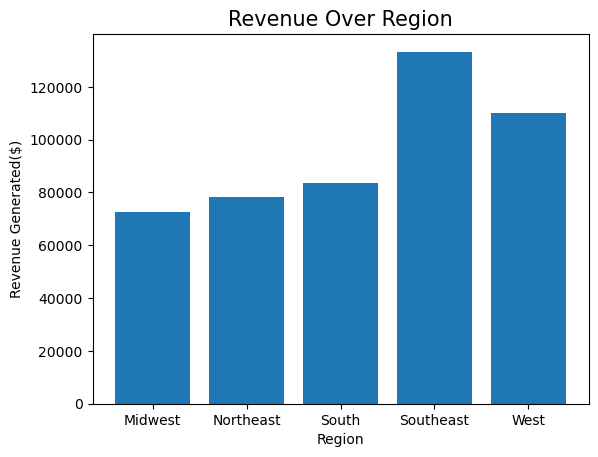

In [11]:
grouped_df = df.groupby("Region")[["Total Sales"]].mean()
plt.bar(grouped_df.index, grouped_df["Total Sales"])
plt.title("Revenue Over Region",fontsize=15)
plt.xlabel("Region")
plt.ylabel("Revenue Generated($)")
plt.show()

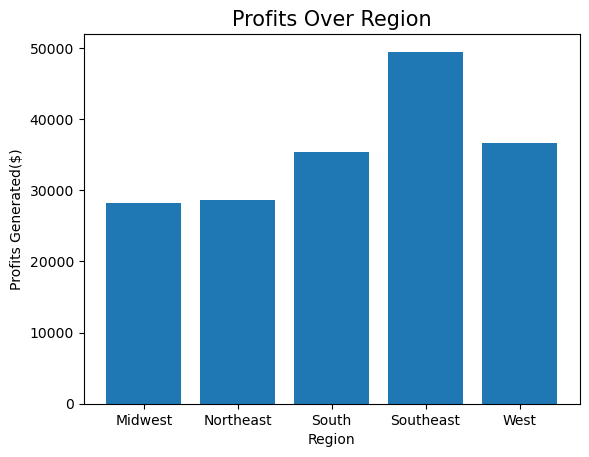

In [12]:
groupedpro_df = df.groupby("Region")[["Operating Profit"]].mean()
plt.bar(groupedpro_df.index, groupedpro_df["Operating Profit"])
plt.title("Profits Over Region",fontsize=15)
plt.xlabel("Region")
plt.ylabel("Profits Generated($)")
plt.show()

### Overall, we can see that Adidas has gained a great momentum over Southeast and West region of US. It is always good to know the strategies that is applied in these region and use them in other regions to get better revenues and profits.

### Surprisingly, South region has got good profits although they had less sales compared to west region. In simple terms, more profits in less sales. Probably, knowing the strategies applied in costing and other areas might give the same benefits in other regions too.

## Insight

<Axes: title={'center': 'Retailer Wise Sales'}, xlabel='Retailer', ylabel='Total Sales'>

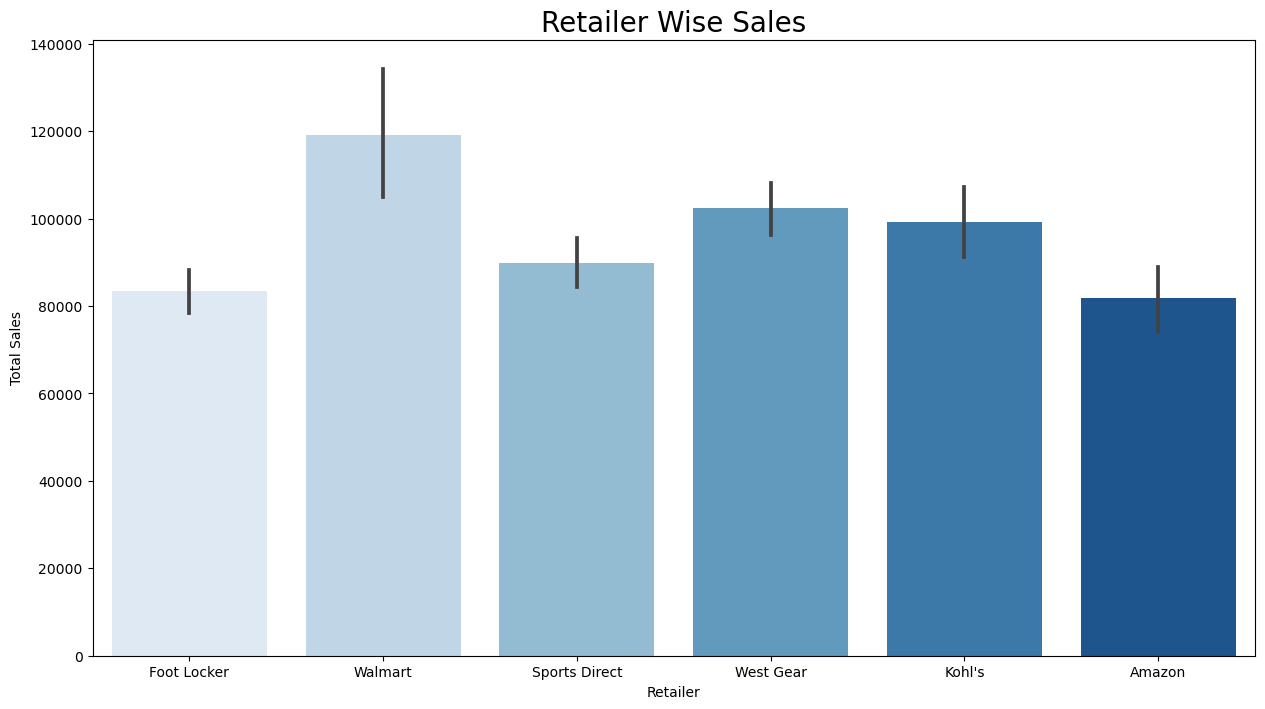

In [13]:
ax = plt.figure(figsize=(15,8))
plt.title("Retailer Wise Sales",fontsize=20)
sns.barplot(data=df, x="Retailer", y="Total Sales",palette="Blues")


<Axes: title={'center': 'Retailer Wise Profits'}, xlabel='Retailer', ylabel='Operating Profit'>

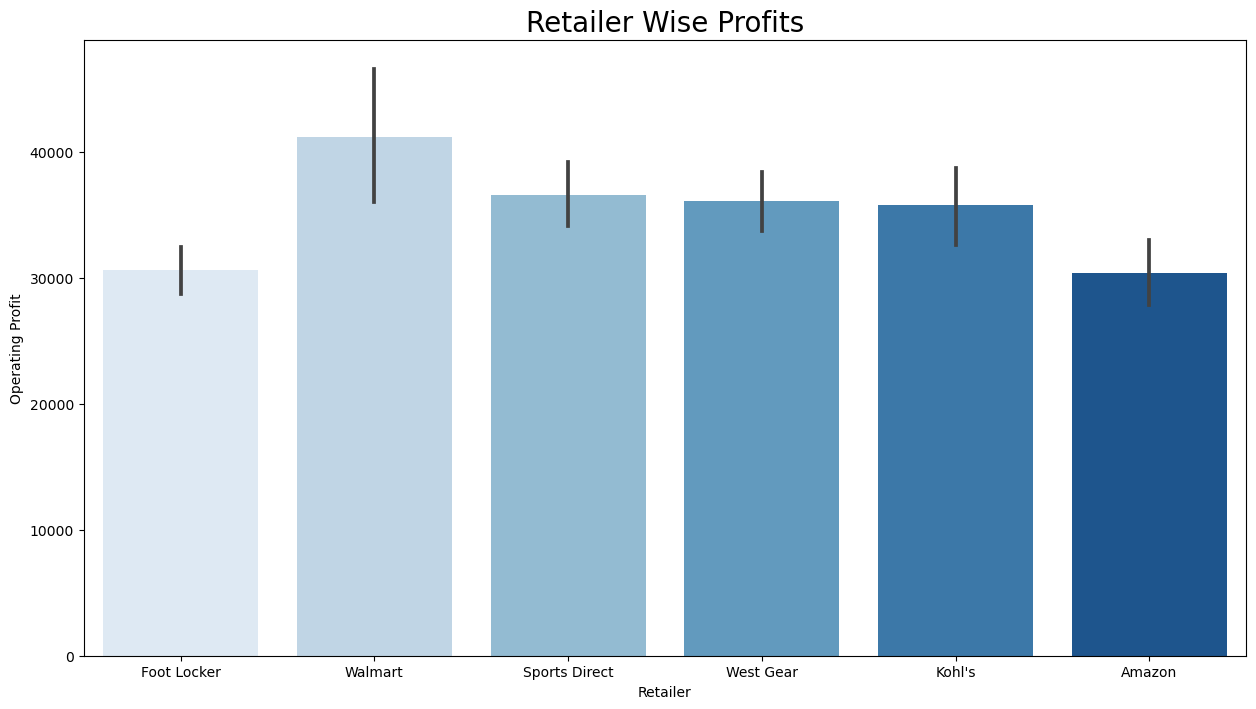

In [55]:
ax = plt.figure(figsize=(15,8))
plt.title("Retailer Wise Profits",fontsize=20)
sns.barplot(data=df, x="Retailer", y="Operating Profit",palette="Blues")

Text(0.5, 1.0, 'Retailer Wise Margins')

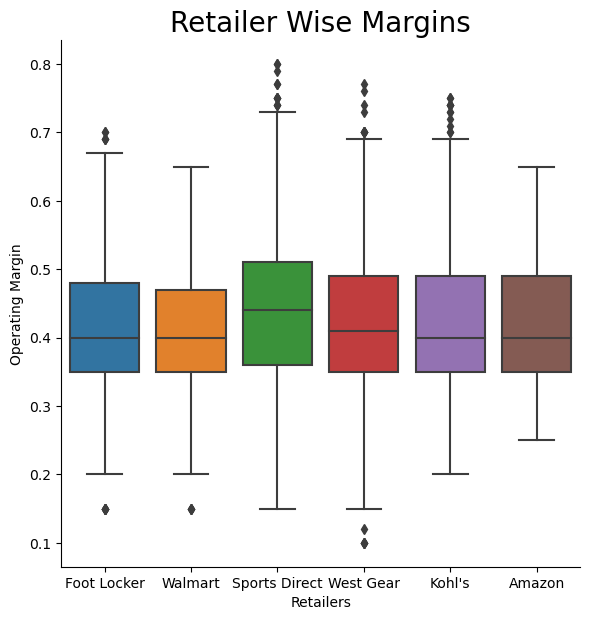

In [56]:
sns.catplot(data=df, x="Retailer", y="Operating Margin", kind="box",height=6).set(xlabel="Retailers",ylabel="Operating Margin")
plt.title("Retailer Wise Margins",fontsize=20)


### We have got our most of the revenue and profits from Walmart, a good relationship is maintained. However, we are required to find out reasons behind our pitfall in other retailer. We can cover Sports Direct in a better way if we reduce the margin kept for them. As charts depict, that more profits earned at limited revenue.

### Moreover, to increase the market share further more, targeting few more retailers will be a great idea.

## Insight

Text(0.5, 1.0, 'Monthly Sales')

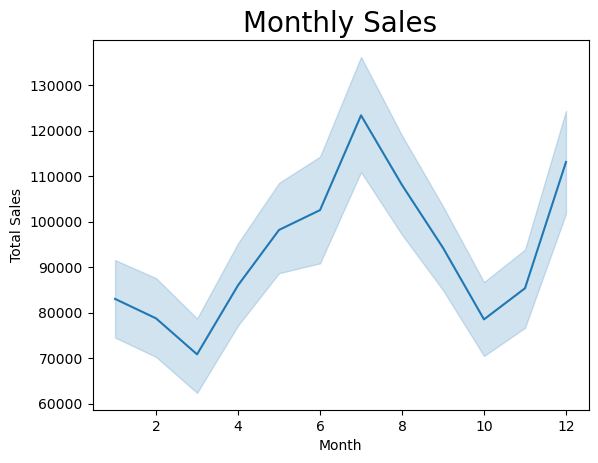

In [41]:
sns.lineplot(data=df, x="month", y="Total Sales").set(xlabel="Month")
plt.title("Monthly Sales",fontsize=20)

### There is good amount of sales in the month between June to August and in December. Probably, we can expect more sales if there is more stocks available. However, is it the same for all the retailers we have?

Text(0.5, 1.0, 'Monthly Sales')

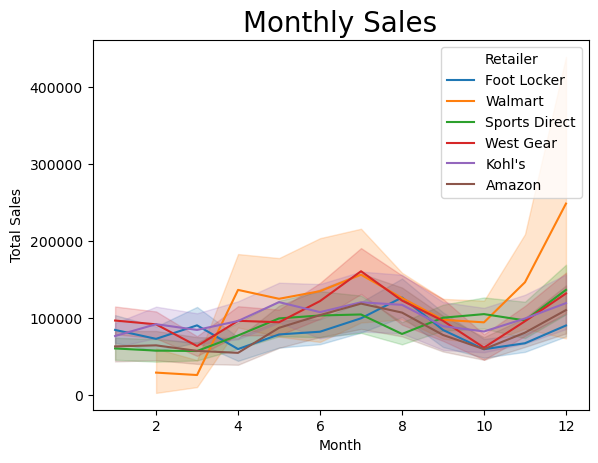

In [16]:
sns.lineplot(data=df, x="month", y="Total Sales",hue="Retailer").set(xlabel="Month")
plt.title("Monthly Sales",fontsize=20)

### Abnormally, Walmart, the best retailer had quite bad experiences in the month of February. 

## Insight

In [57]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year,month,day
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store,2020,1,1
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store,2020,1,2
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store,2020,1,3
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store,2020,1,4
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store,2020,1,5


In [77]:
productwise_sales = df.groupby("Product")["Units Sold"].sum().sort_values(ascending=False).reset_index()

In [78]:
productwise_sales

,Product,Units Sold
0,Men's Street Footwear,593320
1,Men's Athletic Footwear,435526
2,Women's Apparel,433827
3,Women's Street Footwear,392269
4,Women's Athletic Footwear,317236
5,Men's Apparel,306683


In [79]:
px.bar(productwise_sales, x= 'Product', y = 'Units Sold', 
       title="Top Selling Products", 
       template="ggplot2")

### Overall, mens division had performed well compared to the females. There is some form of discrimination in the selling pattern that incline towards males. We need to devise strategies that focus both the sex. 

## Insight